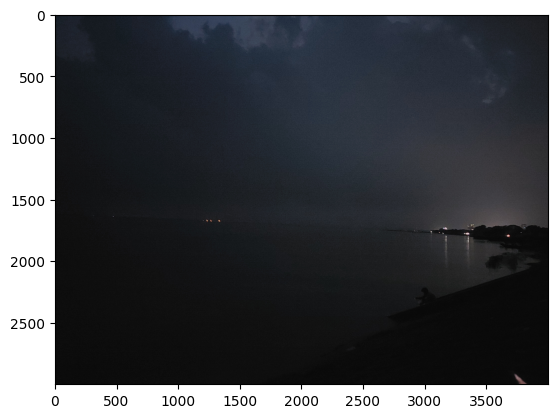

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('20211004_182123.jpg', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height = image.shape[0] 
width = image.shape[1] 
color = image.shape[2]
plt.imshow(image)

In [2]:
print(height)
print(width)
print(color)

730
422
3


In [3]:
print("complexity =" , height*width*color/1000000)

complexity = 0.92418


In [4]:
for i in range(height):
    for j in range(width):
        for k in range(color):
            image[i][j][k]

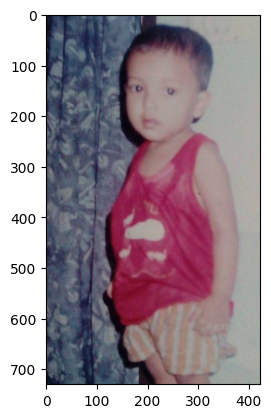

In [5]:
plt.imshow(image)

# Linear (Negative and Identity Transformation)

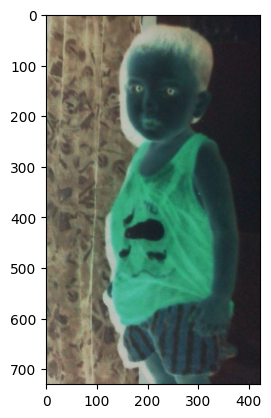

In [6]:

mn=10000000000000000000
for i in range(height):
    for j in range(width):
        for k in range(color):
            mn=min(mn,image[i][j][k])



newimg=np.empty(shape=(height,width,color))

#s=l-1-r
#l range[0-255]

L=int(input("Enter the l value = "))


for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=L-1-image[i][j][k]
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)




# logarithmic transformation

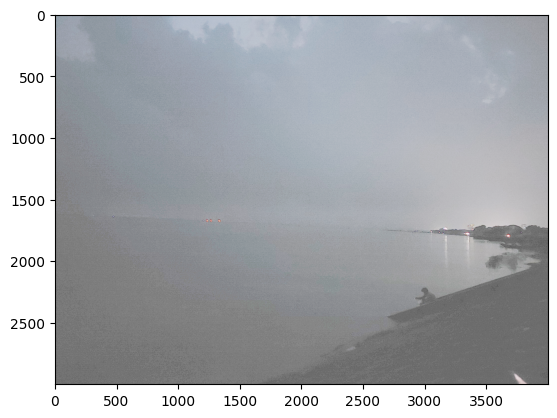

In [6]:

mx=-1
for i in range(height):
    for j in range(width):
        for k in range(color):
            mx=max(mx,image[i][j][k])



newimg=np.empty(shape=(height,width,color))
#s=c*log(1+r)
#c=255/log(1+maxpixel)

c=255/np.log(1+mx)
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=c*np.log(1+image[i][j][k])
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)

# Power Law or Gamma Correction transformatiom

In [7]:



# use gamma value [.5 to 1.5 to get btter performace] 
# to dark 0.8 
# to bright the image 1.2


gamma=np.float32(input("Enter gamma value = "))

neg=0
if(gamma<0):
    neg=1
    gamma=np.abs(gamma)

newimg=np.empty(shape=(height,width,color))
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=255*np.power(image[i][j][k],gamma)/np.power(255,gamma)
            

            if(neg==1):
                newimg[i][j][k]=1/newimg[i][j][k]
            
           
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
        


plt.imshow(newimg)

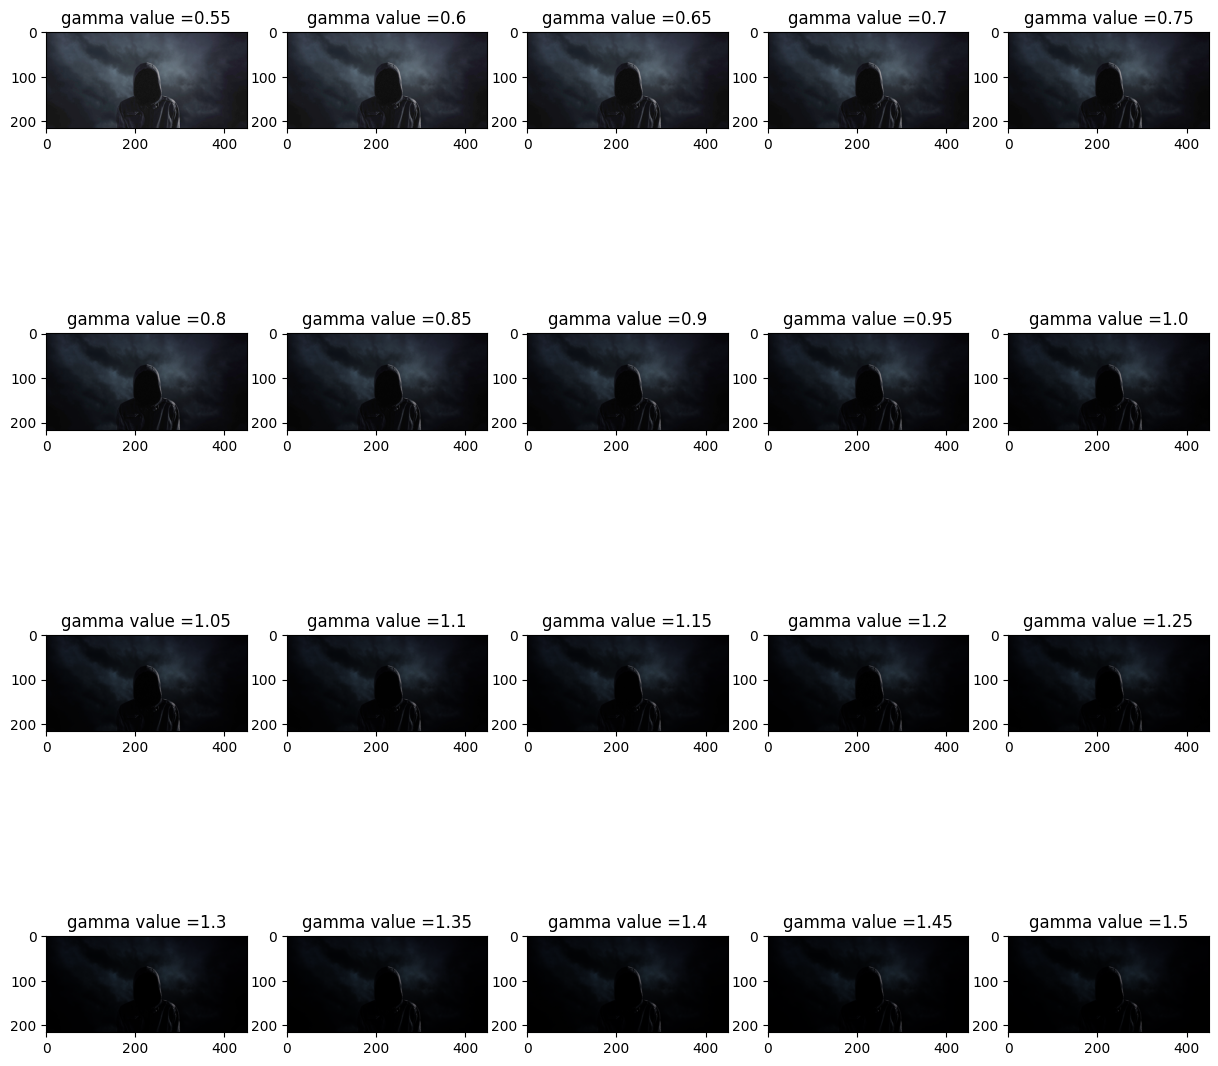

In [8]:

samples=int(20)

fig, axs = plt.subplots(int(samples/5), 5, figsize=(15, 15))
#fig, axs = plt.subplots()

gamma=.5
newimg=np.empty(shape=(height,width,color))
for z in range(samples):
    gamma+=.05
    neg=0
    if(gamma<0):
        neg=1
        gamma=np.abs(gamma)

    
    for i in range(height):
        for j in range(width):
            for k in range(color):
                newimg[i][j][k]=255*np.power(image[i][j][k],gamma)/np.power(255,gamma)
                

                if(neg==1):
                    newimg[i][j][k]=1/newimg[i][j][k]
                
            
                newimg[i][j][k]=max(0,newimg[i][j][k])
                newimg[i][j][k]=min(255,newimg[i][j][k])
                newimg[i][j][k]/=255


    axs[int(z/5)][z%5].imshow(newimg)
    string="gamma value ="+str(round(gamma,2))
    axs[int(z/5)][z%5].set_title(string)  
    



# constrast strecting (thershold)

Text(0.5, 1.0, 'threshold')

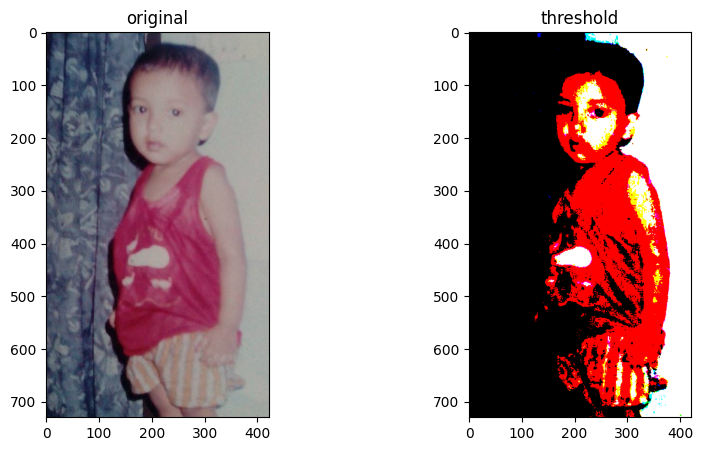

In [10]:


th=int(input("input threashold value ="))


newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("original") 


for i in range(height):
        for j in range(width):
            for k in range(color):
              if(image[i][j][k]>=th):
                newimg[i][j][k]=255
              else:
                newimg[i][j][k]=0
              newimg[i][j][k]/=255


axs[1].imshow(newimg)
axs[1].set_title("threshold") 
                


# constrast strecting (Max-min)

Text(0.5, 1.0, 'max-min')

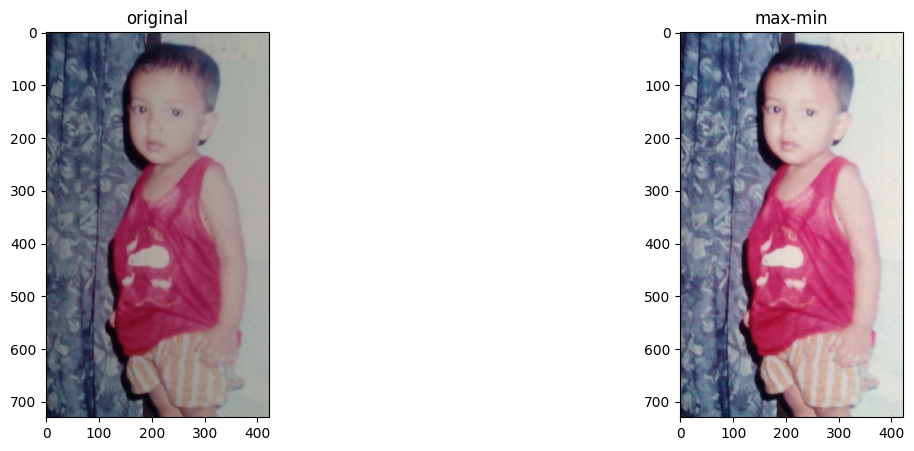

In [11]:

newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("original")   
for k in range(color):
  mx=-1
  mn=1000000000000
  for i in range(height):
      for j in range(width):
          for z in range(color):
              mx=max(mx,image[i][j][z])
              mn=min(mn,image[i][j][z])
  for i in range(height):
          for j in range(width):
              newimg[i][j][k]=(255*(image[i][j][k]-mn))/(mx-mn)
              newimg[i][j][k]/=255

axs[1].imshow(newimg)
axs[1].set_title("max-min")  



# constrast strecting (Percentile)

Text(0.5, 1.0, 'Percetile')

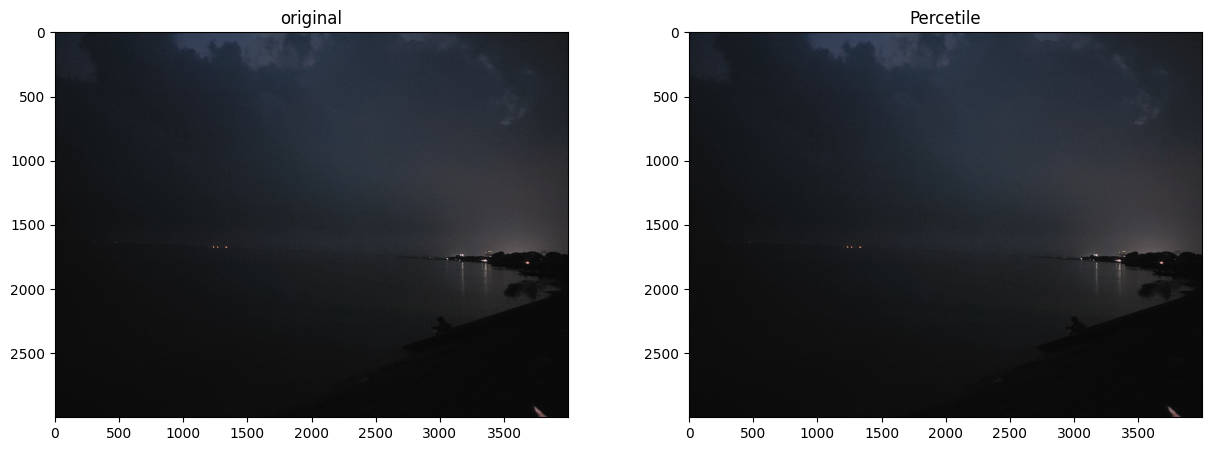

In [5]:
newimg=np.empty(shape=(height,width,color))

C=int(input("Enter C value ="))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("original")   
for k in range(color):
  mx=-1
  mn=1000000000000
  mx-=C
  mn+=C
  for i in range(height):
      for j in range(width):
          for z in range(color):
              mx=max(mx,image[i][j][z])
              mn=min(mn,image[i][j][z])
  for i in range(height):
          for j in range(width):
              newimg[i][j][k]=(255*(image[i][j][k]-mn))/(mx-mn)
              newimg[i][j][k]/=255

axs[1].imshow(newimg)
axs[1].set_title("Percetile")  

# intensity level slicing 

Text(0.5, 1.0, 'threshold')

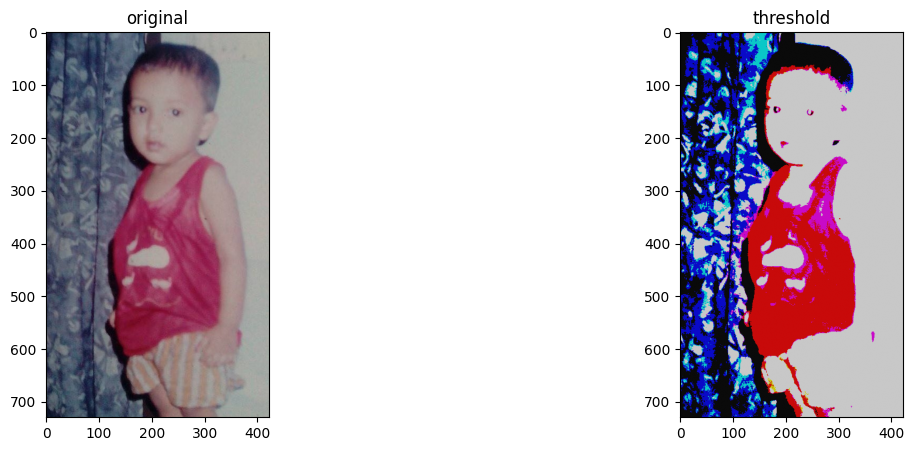

In [13]:

lw,hi=input("Enter two values:[low and high] ").split()

lw=int(lw)
hi=int(hi)

newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("original") 


for i in range(height):
        for j in range(width):
            for k in range(color):
              if(image[i][j][k]>=lw and image[i][j][k]<=hi ):
                newimg[i][j][k]=200
              else:
                newimg[i][j][k]=10
              newimg[i][j][k]/=255


axs[1].imshow(newimg)
axs[1].set_title("threshold") 

# histogram equalization

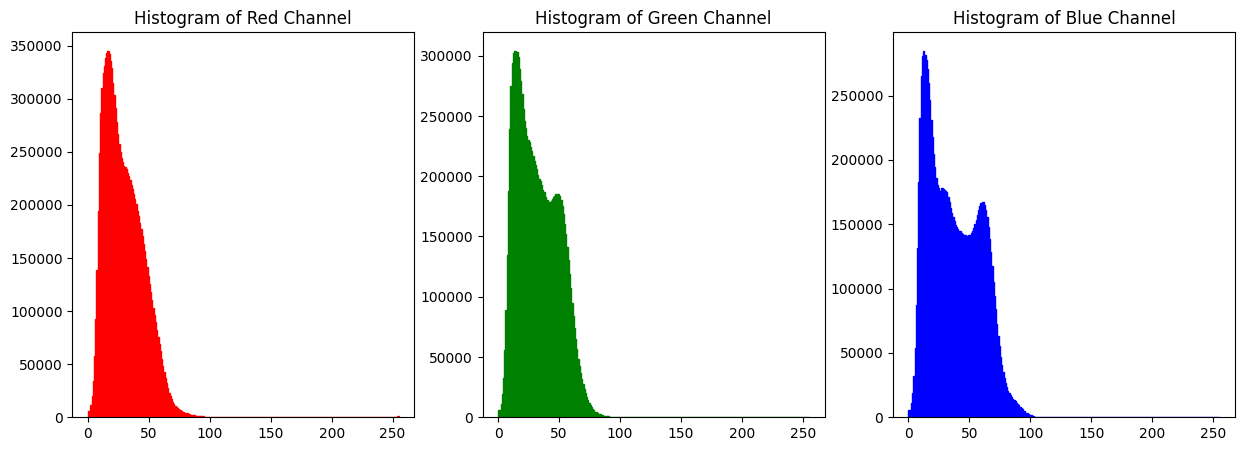

In [2]:
# Splitting the image into its RGB channels
def display_histogram(image):

    r, g, b = np.split(image, 3, axis=2)

    # Create a figure with subplots for each channel
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot histogram for the red channel
    axs[0].hist(r.ravel(), bins=255, color='red', edgecolor='red')
    axs[0].set_title("Histogram of Red Channel")

    # Plot histogram for the green channel
    axs[1].hist(g.ravel(), bins=255, color='green', edgecolor='green')
    axs[1].set_title("Histogram of Green Channel")

    # Plot histogram for the blue channel
    axs[2].hist(b.ravel(), bins=255, color='blue', edgecolor='blue')
    axs[2].set_title("Histogram of Blue Channel")
    # Display the plot
    plt.show()

display_histogram(image)

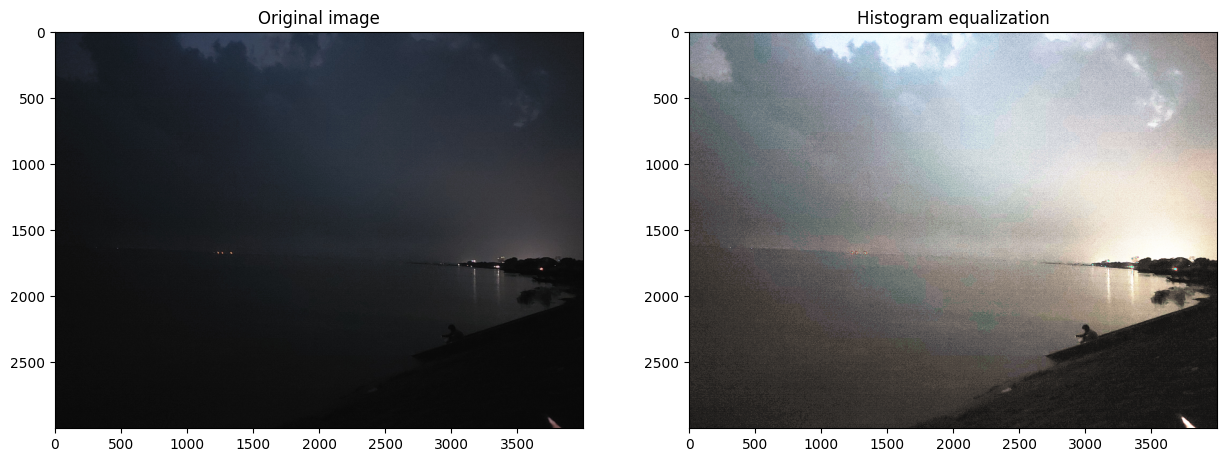

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
newimg=np.empty(shape=(height,width,color))
for k in range(color):
        data = np.zeros(256)
        for i in range(height):
                for j in range(width):
                        data[image[i][j][k]]+=1
        for i in range(256):
                data[i]=data[i]/(height*width)
        for i in range(1,255):
                data[i]+=data[i-1]
        for i in range(256):
                data[i]*=255
                data[i]=round(data[i])
        for i in range(height):
                for j in range(width):
                        newimg[i][j][k]=data[image[i][j][k]]/255

axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(newimg)
axs[1].set_title("Histogram equalization") 
plt.show()


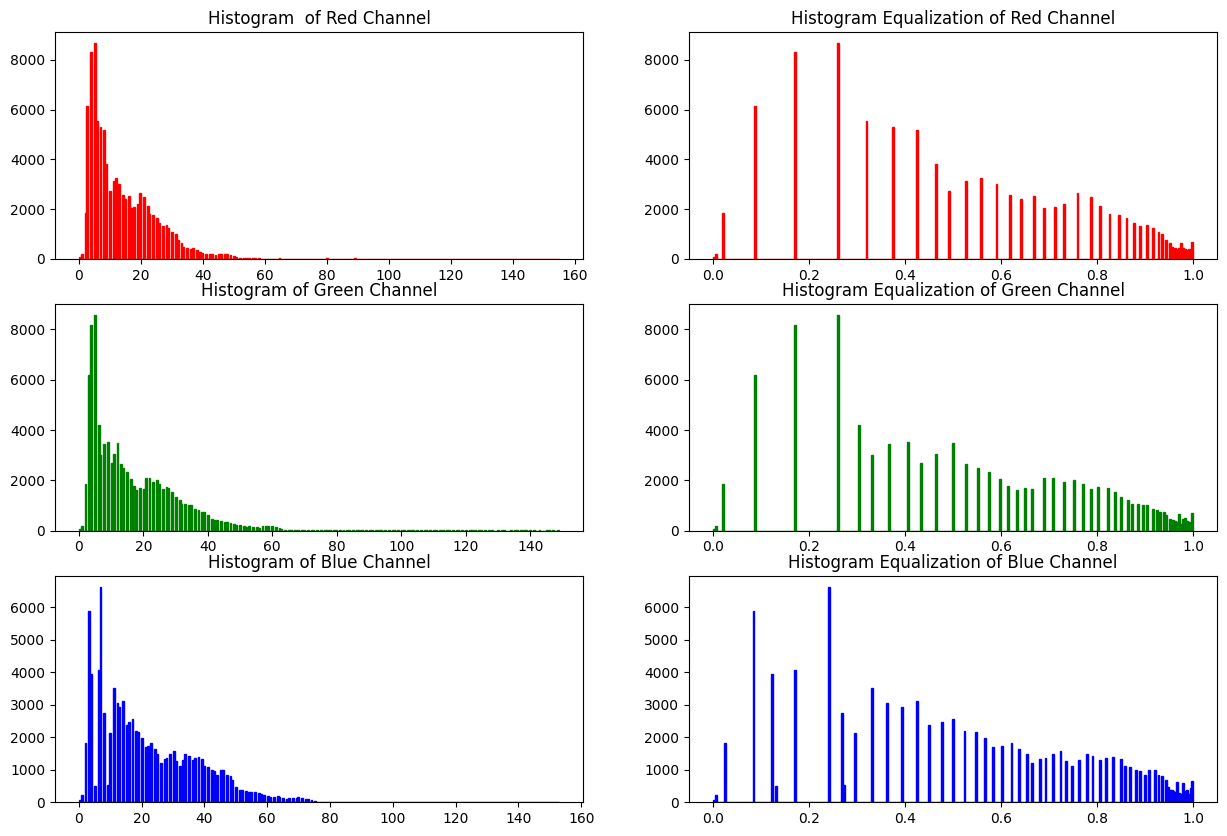

In [11]:

fig, axs = plt.subplots(3, 2, figsize=(15, 10))
r, g, b = np.split(image, 3, axis=2)


axs[0][0].hist(r.ravel(), bins=255, color='red', edgecolor='red')
axs[0][0].set_title("Histogram  of Red Channel")
axs[1][0].hist(g.ravel(), bins=255, color='green', edgecolor='green')
axs[1][0].set_title("Histogram of Green Channel")
axs[2][0].hist(b.ravel(), bins=255, color='blue', edgecolor='blue')
axs[2][0].set_title("Histogram of Blue Channel")
r, g, b = np.split(newimg, 3, axis=2)
axs[0][1].hist(r.ravel(), bins=255, color='red', edgecolor='red')
axs[0][1].set_title("Histogram Equalization of Red Channel")
axs[1][1].hist(g.ravel(), bins=255, color='green', edgecolor='green')
axs[1][1].set_title("Histogram Equalization of Green Channel")
axs[2][1].hist(b.ravel(), bins=255, color='blue', edgecolor='blue')
axs[2][1].set_title("Histogram Equalization of Blue Channel")


plt.show()

# Histogram specification

In [12]:
def histogram_equalization(img):
        height = img.shape[0] 
        width = img.shape[1] 
        color = img.shape[2]
        data=np.zeros((256, 3))
        for k in range(color):
                for i in range(height):
                        for j in range(width):
                                data[img[i][j][k]][k]+=1
                for i in range(256):
                        data[i][k]=data[i][k]/(height*width)
                for i in range(1,255):
                        data[i][k]+=data[i-1][k]
                for i in range(256):
                        data[i][k]*=255
                        data[i][k]=round(data[i][k])
        return data

In [13]:
image2 = cv2.imread('Dark.PNG', 1)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
data = histogram_equalization(image)
data2 = histogram_equalization(image2)


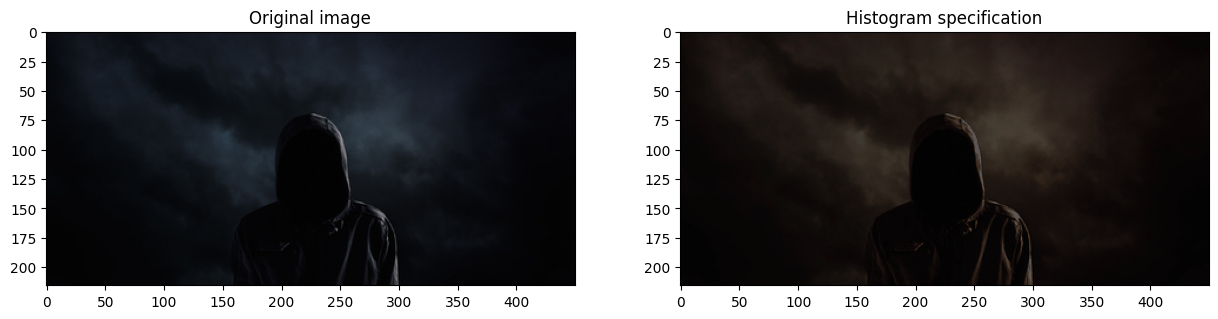

In [14]:
data3 =np.zeros((256, 3))
for k in range(color):
    for i in range(256):
        for j in range(256):
            if(data[i][k]<=data2[j][k]):
                data3[i][k]=j
                break



fig, axs = plt.subplots(1, 2, figsize=(15, 10))
newimg=np.empty(shape=(height,width,color))


for k in range(color):
    for i in range(height):
        for j in range(width):
            newimg[i][j][k]=data3[image[i][j][k]][k]/255



axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(newimg)
axs[1].set_title("Histogram specification") 
plt.show()


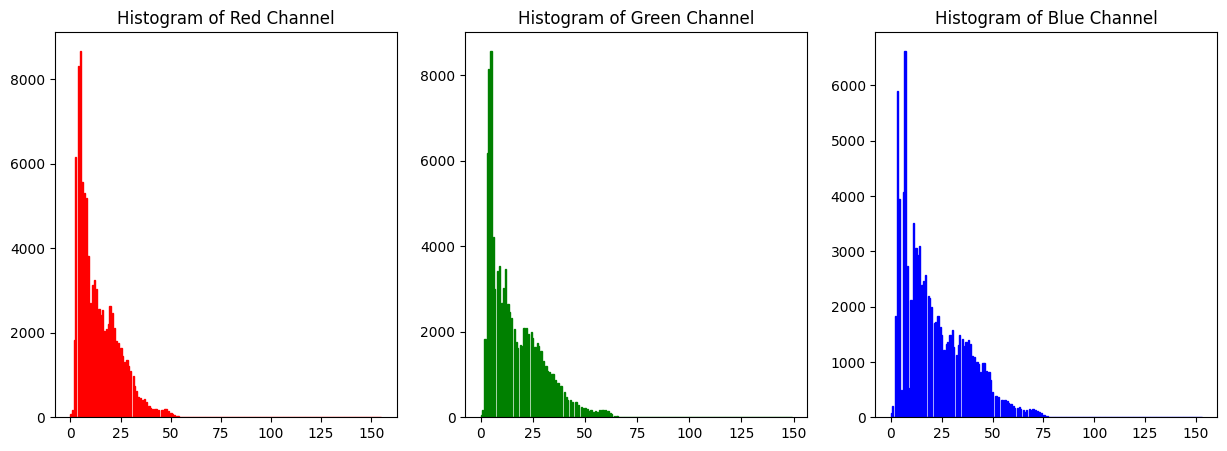

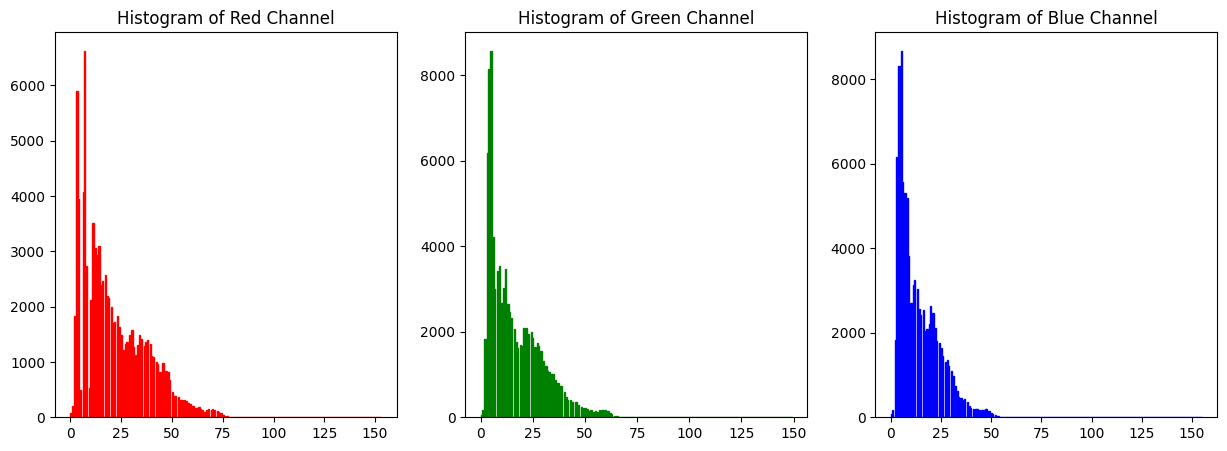

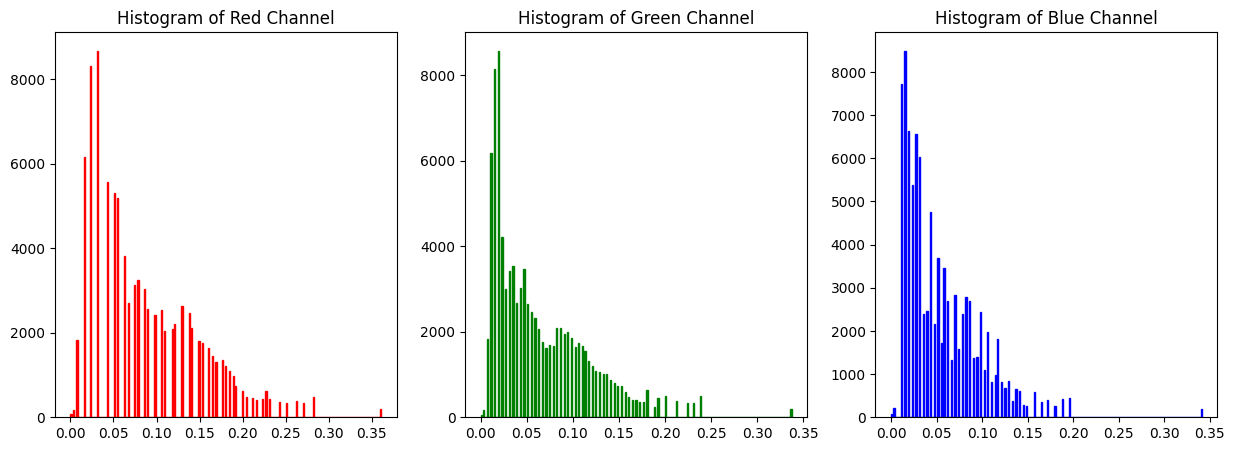

In [15]:
display_histogram(image)
display_histogram(image2)
display_histogram(newimg)

# sharpening using laplasian method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


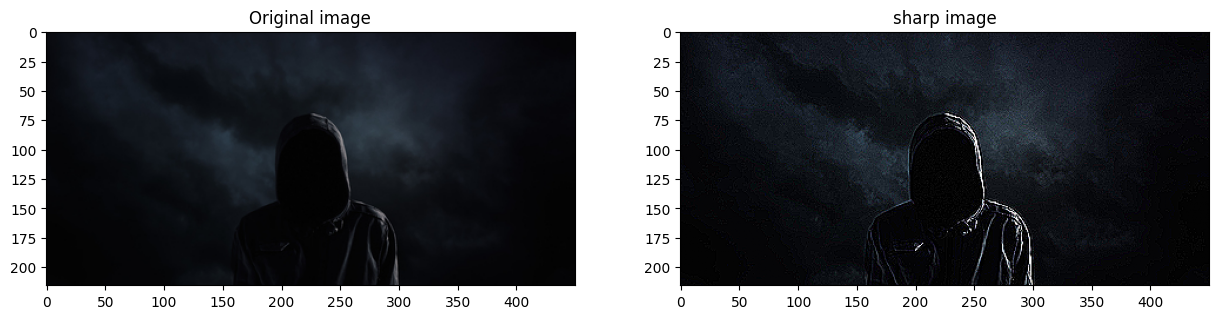

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
laplasianMask= [ [ 0 , -1 , 0 ] , [-1 , 4, -1 ], [0 , -1 , 0]  ]

sharpIntensity=3

newimg=np.empty(shape=(height,width,color))
lapimage=np.empty(shape=(height,width,color))
for i in range(height):
     for j in range(width):
          for k in range(color):
               lapimage[i][j][k]=0
               for a in range(3):
                    for b in range(3):
                         if( (i-1+a<0 and j-1+b<0) or(i-1+a<0 and j-1+b>=width) or (i-1+a>=height and j-1+b<0) or(i-1+a>=height and j-1+b>=width) ):
                              x=image[i][j][k]
                         elif(i-1+a<0):
                             x=image[0][j-1+b][k]
                         elif(i-1+a>=height):
                              x=image[height-1][j-1+b][k]
                         elif(j-1+b<0):
                              x=image[i-1+a][0][k]
                         elif(j-1+b>=width):
                              x=image[i-1+a][width-1][k]
                         else:
                              x=image[i-1+a][j-1+b][k]
                         lapimage[i][j][k]+=laplasianMask[a][b]*x
               newimg[i][j][k]=sharpIntensity*lapimage[i][j][k]+image[i][j][k]
               #print(newimg[i][j][k]," " ,image[i][j][k])
               newimg[i][j][k]/=255

axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(newimg)
axs[1].set_title("sharp image") 
plt.show()

# sharpening using laplasian method considering diagonal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


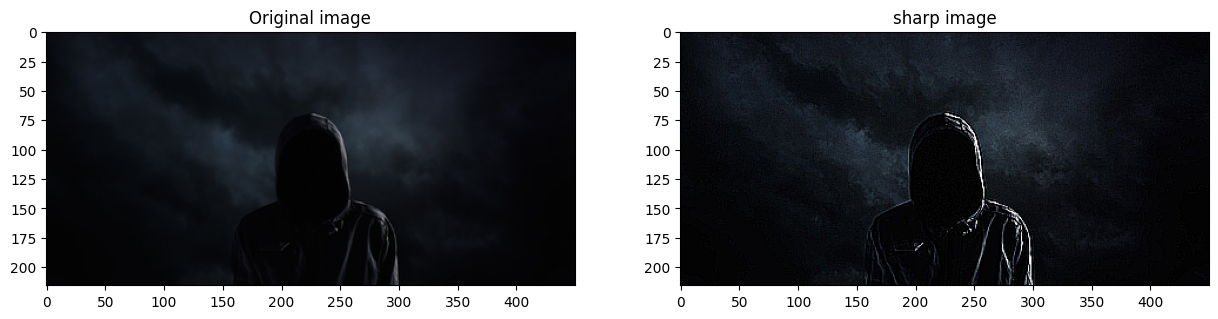

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
laplasianMask= [ [ -1 , -1 , -1 ] , [-1 , 8, -1 ], [-1 , -1 , -1]  ]

sharpIntensity=1

newimg=np.empty(shape=(height,width,color))
lapimage=np.empty(shape=(height,width,color))
for i in range(height):
     for j in range(width):
          for k in range(color):
               lapimage[i][j][k]=0
               for a in range(3):
                    for b in range(3):
                         if( (i-1+a<0 and j-1+b<0) or(i-1+a<0 and j-1+b>=width) or (i-1+a>=height and j-1+b<0) or(i-1+a>=height and j-1+b>=width) ):
                              x=image[i][j][k]
                         elif(i-1+a<0):
                             x=image[0][j-1+b][k]
                         elif(i-1+a>=height):
                              x=image[height-1][j-1+b][k]
                         elif(j-1+b<0):
                              x=image[i-1+a][0][k]
                         elif(j-1+b>=width):
                              x=image[i-1+a][width-1][k]
                         else:
                              x=image[i-1+a][j-1+b][k]
                         lapimage[i][j][k]+=laplasianMask[a][b]*x
               newimg[i][j][k]=sharpIntensity*lapimage[i][j][k]+image[i][j][k]
               #print(newimg[i][j][k]," " ,image[i][j][k])
               newimg[i][j][k]/=255

axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(newimg)
axs[1].set_title("sharp image") 
plt.show()

# unsharp maskign and highboosting 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


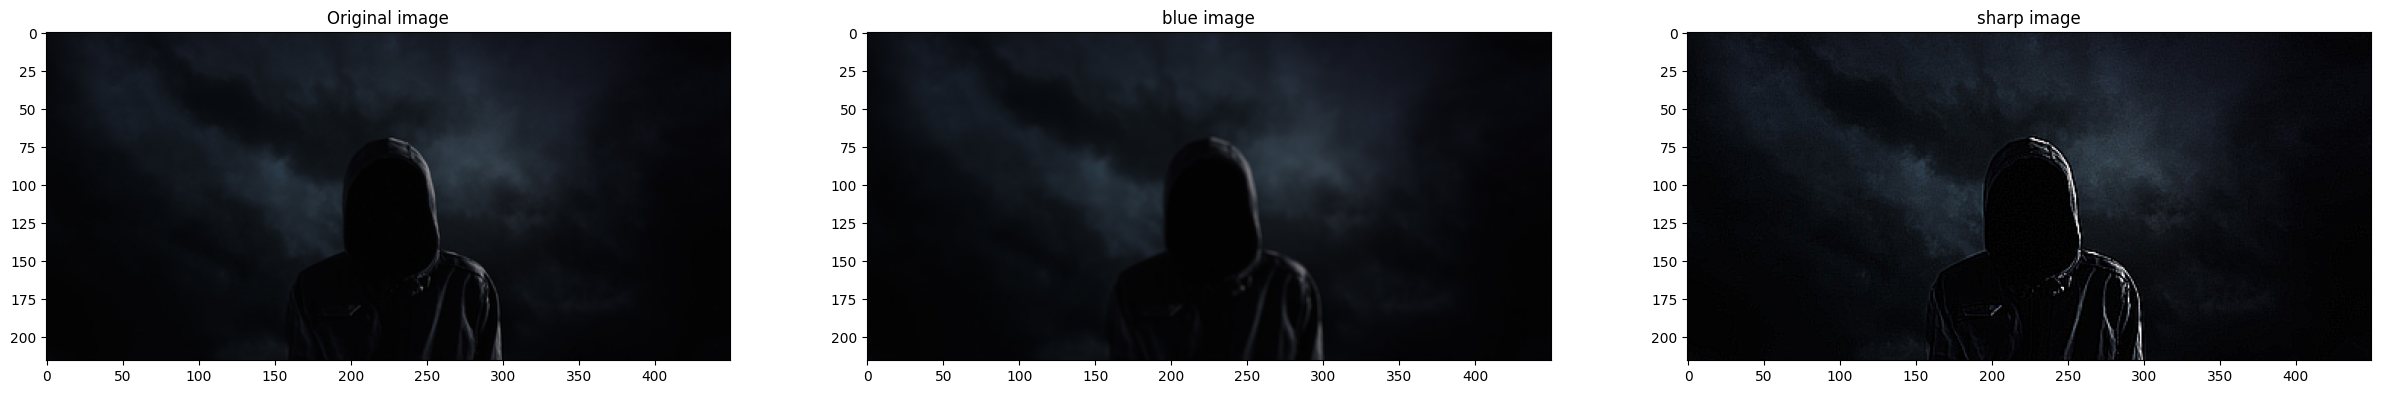

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(30, 20))
stdMask= [ [ 1 , 1 , 1 ] , [1 , 1, 1 ], [1 , 1 , 1]  ]

sharpIntensity=4

newimg=np.empty(shape=(height,width,color))
blurImage=np.empty(shape=(height,width,color))
mask = np.empty(shape=(height,width,color))
for i in range(height):
     for j in range(width):
          for k in range(color):
               lapimage[i][j][k]=0
               for a in range(3):
                    for b in range(3):
                        if( (i-1+a<0 and j-1+b<0) or(i-1+a<0 and j-1+b>=width) or (i-1+a>=height and j-1+b<0) or(i-1+a>=height and j-1+b>=width) ):
                              x=image[i][j][k]
                        elif(i-1+a<0):
                             x=image[0][j-1+b][k]
                        elif(i-1+a>=height):
                              x=image[height-1][j-1+b][k]
                        elif(j-1+b<0):
                              x=image[i-1+a][0][k]
                        elif(j-1+b>=width):
                              x=image[i-1+a][width-1][k]
                        else:
                              x=image[i-1+a][j-1+b][k]
                        blurImage[i][j][k]+=(stdMask[a][b]*x)/9
               

               mask[i][j][k]=image[i][j][k]-blurImage[i][j][k]
               newimg[i][j][k]=sharpIntensity*mask[i][j][k]+image[i][j][k]

               newimg[i][j][k]/=255
               blurImage[i][j][k]/=255

axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(blurImage)
axs[1].set_title("blue image")
axs[2].imshow(newimg)
axs[2].set_title("sharp image")  
plt.show()

# using gradient find edges of the photo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


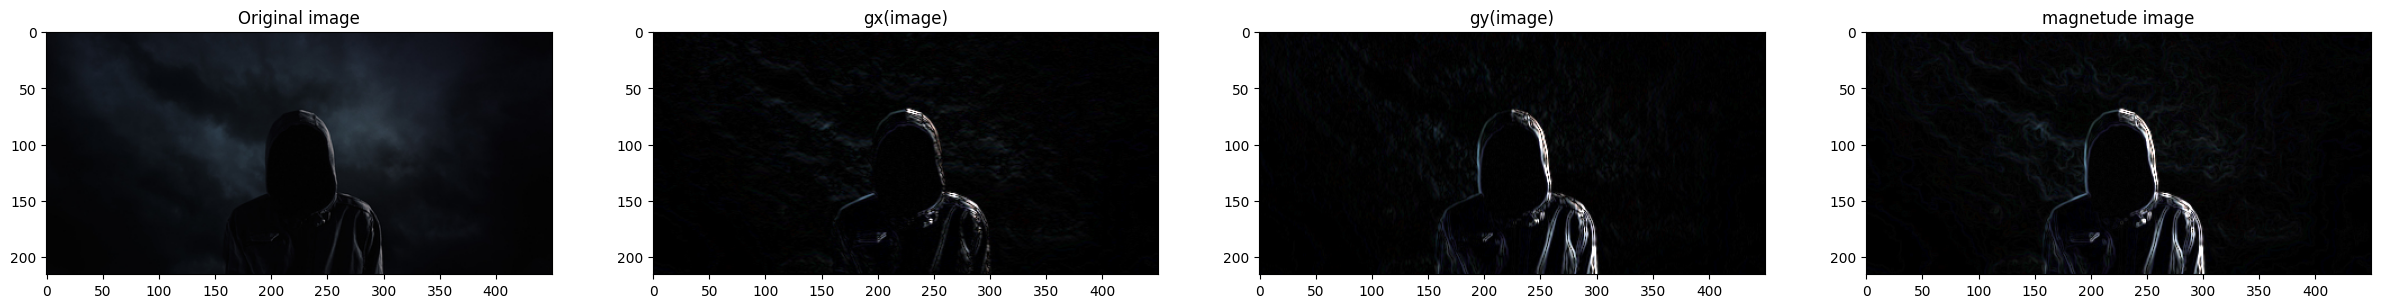

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(30, 20))
gx= [   [ -1,-2 ,-1 ] ,
        [0  , 0 , 0 ],
        [1  , 2 , 1 ]]

gy= [   [ -1,   0 ,1 ] ,
        [-2  , 0 , 2 ],
        [-1  , 0 , 1 ]]

import math
newimg=np.empty(shape=(height,width,color))
gximg=np.empty(shape=(height,width,color))
gyimg=np.empty(shape=(height,width,color))

for i in range(height):
     for j in range(width):
          for k in range(color):
               
               for a in range(3):
                    for b in range(3):
                        if( (i-1+a<0 and j-1+b<0) or(i-1+a<0 and j-1+b>=width) or (i-1+a>=height and j-1+b<0) or(i-1+a>=height and j-1+b>=width) ):
                              x=image[i][j][k]
                        elif(i-1+a<0):
                             x=image[0][j-1+b][k]
                        elif(i-1+a>=height):
                              x=image[height-1][j-1+b][k]
                        elif(j-1+b<0):
                              x=image[i-1+a][0][k]
                        elif(j-1+b>=width):
                              x=image[i-1+a][width-1][k]
                        else:
                              x=image[i-1+a][j-1+b][k]
                        gximg[i][j][k]+=gx[a][b]*x
                        gyimg[i][j][k]+=gy[a][b]*x
               

               newimg[i][j][k]=math.sqrt( gximg[i][j][k]*gximg[i][j][k] +   gyimg[i][j][k]*gyimg[i][j][k] )
               gximg[i][j][k]=abs(gximg[i][j][k])
               gyimg[i][j][k]=abs(gyimg[i][j][k])
               newimg[i][j][k]/=255
               gyimg[i][j][k]/=255
               gximg[i][j][k]/=255

axs[0].imshow(image)
axs[0].set_title("Original image") 
axs[1].imshow(gximg)
axs[1].set_title("gx(image)")
axs[2].imshow(gyimg)
axs[2].set_title("gy(image)")  
axs[3].imshow(newimg)
axs[3].set_title("magnetude image")  
plt.show()